# House Price Prediction using Keras Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Exploratory Data Analysis

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


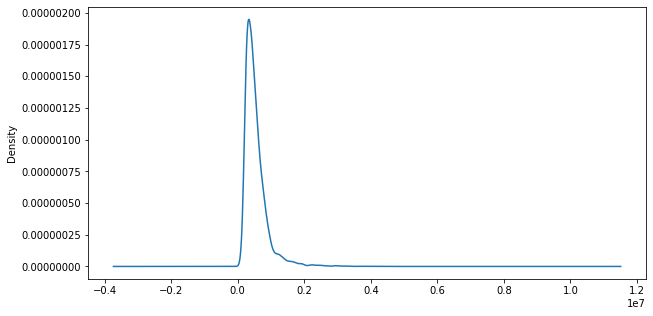

In [6]:
plt.figure(figsize=(10, 5))
df['price'].plot(kind='kde')

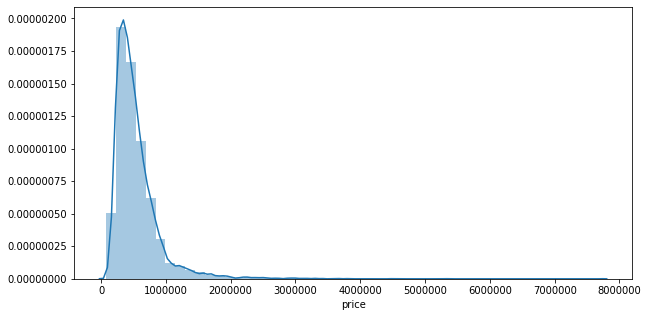

In [7]:
plt.figure(figsize=(10,5))
sns.distplot(df['price'])

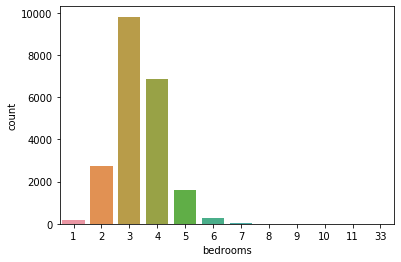

In [8]:
sns.countplot(df['bedrooms'])

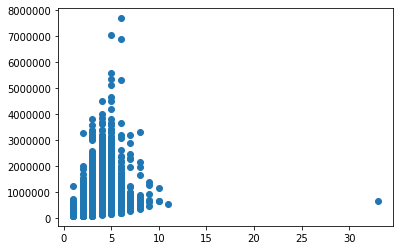

In [9]:
plt.scatter(x=df['bedrooms'], y=df['price'])

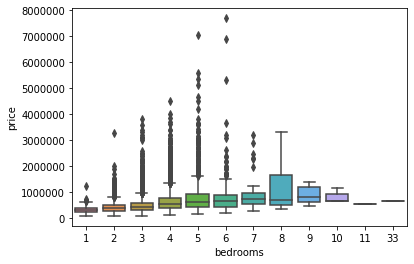

In [10]:
sns.boxplot(x=df['bedrooms'], y=df['price'])

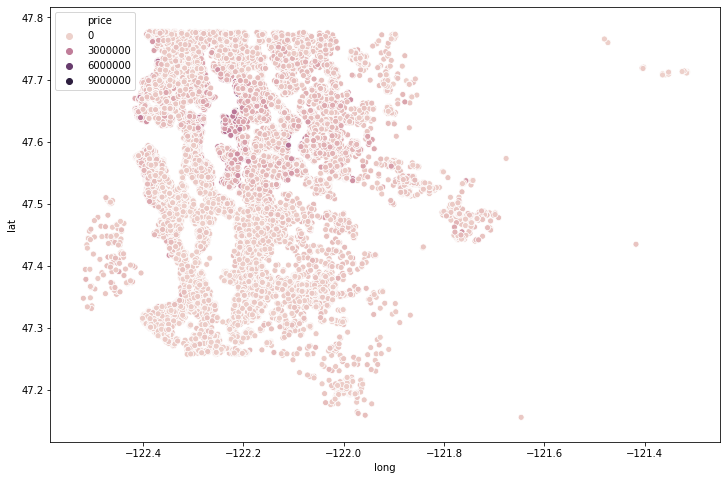

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=df, hue='price')

In [12]:
df['price'].sort_values()

15279      78000.0
465        80000.0
16184      81000.0
8267       82000.0
2139       82500.0
           ...    
1446     5350000.0
4407     5570000.0
9245     6890000.0
3910     7060000.0
7245     7700000.0
Name: price, Length: 21597, dtype: float64

In [13]:
df.sort_values(by='price', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


In [14]:
df_no_top_1_perc = df.sort_values(by='price', ascending=False).iloc[np.int(len(df)*0.01+1):]

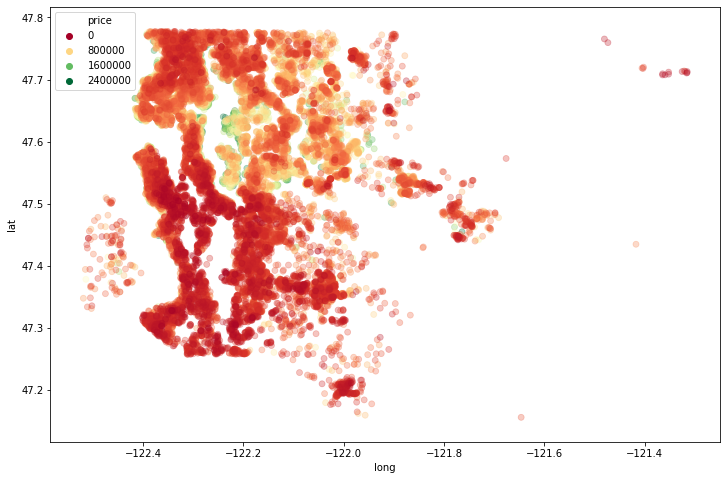

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=df_no_top_1_perc, hue='price', alpha=0.3, palette='RdYlGn', edgecolor=None)

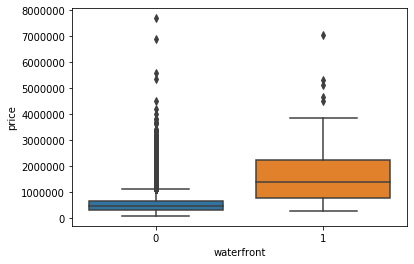

In [16]:
sns.boxplot(x='waterfront', y='price', data=df)

In [17]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

## Feature Engineering

In [18]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [19]:
df.drop(['id', 'zipcode'], axis=1, inplace=True)

In [20]:
df['date'] = pd.to_datetime(df['date'])

In [21]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [22]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


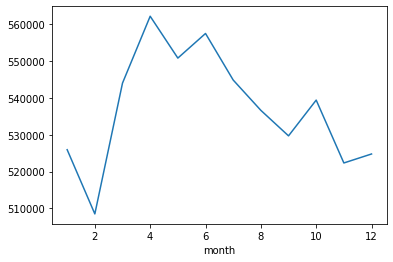

In [23]:
df.groupby('month').mean()['price'].plot()

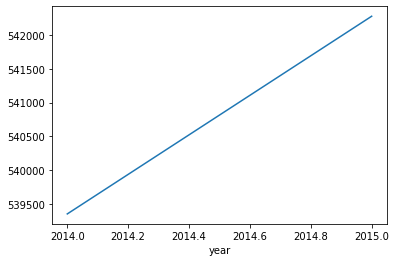

In [24]:
df.groupby('year').mean()['price'].plot()

In [25]:
df.drop('date', axis=1, inplace=True)

In [26]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

## Scaling and Train-Test Split

In [27]:
from sklearn.model_selection import train_test_split

Note: Tensorflow tends to not work well with pandas Series or DataFrames, so we'll use **`.values`** to turn our data into an **`np.ndarray`**.

In [28]:
X = df.drop('price', axis=1).values
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [30]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Creating a Keras ANN Regressor

In [31]:
import tensorflow as tf
from tensorflow import keras

In [32]:
X_train.shape

(15117, 19)

In [33]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(19, activation='relu'))
model.add(keras.layers.Dense(19, activation='relu'))
model.add(keras.layers.Dense(19, activation='relu'))
model.add(keras.layers.Dense(19, activation='relu'))

model.add(keras.layers.Dense(1))

In [34]:
model.compile(optimizer='adam', loss='mse')

In [35]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 96us/sample - loss: 429745174020.3691 - val_loss: 420082673173.4913
Epoch 2/400
15117/15117 [==============================] - 0s 26us/sample - loss: 428853015297.7781 - val_loss: 417084594140.6025
Epoch 3/400
15117/15117 [==============================] - 0s 26us/sample - loss: 417273262448.7673 - val_loss: 391033394153.2444
Epoch 4/400
15117/15117 [==============================] - 0s 26us/sample - loss: 360905080526.3647 - val_loss: 298449379874.1334
Epoch 5/400
15117/15117 [==============================] - 0s 24us/sample - loss: 233673346625.1981 - val_loss: 156745902054.7161
Epoch 6/400
15117/15117 [==============================] - 0s 25us/sample - loss: 122520972166.6807 - val_loss: 100722650599.9802
Epoch 7/400
15117/15117 [==============================] - 0s 25us/sample - loss: 99626045632.1059 - val_loss: 97575401669.2148
Epoch 8/400
15117/15117 [==================

15117/15117 [==============================] - 0s 29us/sample - loss: 39458873987.9204 - val_loss: 41167815889.8568
Epoch 65/400
15117/15117 [==============================] - 0s 29us/sample - loss: 39160849655.0416 - val_loss: 40878605703.9012
Epoch 66/400
15117/15117 [==============================] - 0s 28us/sample - loss: 38915017708.8301 - val_loss: 40589064409.4420
Epoch 67/400
15117/15117 [==============================] - 0s 28us/sample - loss: 38609934640.6869 - val_loss: 40380501136.1185
Epoch 68/400
15117/15117 [==============================] - 0s 28us/sample - loss: 38336996367.3766 - val_loss: 40157343501.2741
Epoch 69/400
15117/15117 [==============================] - 0s 28us/sample - loss: 38079993936.0667 - val_loss: 39886206121.4025
Epoch 70/400
15117/15117 [==============================] - 0s 27us/sample - loss: 37861008219.4636 - val_loss: 39617183622.6370
Epoch 71/400
15117/15117 [==============================] - 0s 27us/sample - loss: 37624633117.0767 - val_loss

15117/15117 [==============================] - 0s 29us/sample - loss: 32356730691.7891 - val_loss: 33933919355.8914
Epoch 128/400
15117/15117 [==============================] - 0s 28us/sample - loss: 32311741357.5963 - val_loss: 33915238364.6025
Epoch 129/400
15117/15117 [==============================] - 0s 28us/sample - loss: 32296970270.6177 - val_loss: 33883337027.6346
Epoch 130/400
15117/15117 [==============================] - 0s 27us/sample - loss: 32280417150.2811 - val_loss: 33830068679.1111
Epoch 131/400
15117/15117 [==============================] - 0s 28us/sample - loss: 32211818522.9598 - val_loss: 33775111949.2741
Epoch 132/400
15117/15117 [==============================] - 0s 30us/sample - loss: 32165803830.0044 - val_loss: 33732578028.4049
Epoch 133/400
15117/15117 [==============================] - 1s 33us/sample - loss: 32151684433.5400 - val_loss: 33695377761.9753
Epoch 134/400
15117/15117 [==============================] - 1s 34us/sample - loss: 32105710839.9899 - v

15117/15117 [==============================] - 0s 29us/sample - loss: 30606807089.5844 - val_loss: 32178220899.2395
Epoch 191/400
15117/15117 [==============================] - 0s 31us/sample - loss: 30589476592.7758 - val_loss: 32205144989.3926
Epoch 192/400
15117/15117 [==============================] - 0s 31us/sample - loss: 30596447348.8486 - val_loss: 32187152823.9407
Epoch 193/400
15117/15117 [==============================] - 0s 29us/sample - loss: 30551961888.1588 - val_loss: 32119118643.2000
Epoch 194/400
15117/15117 [==============================] - 0s 29us/sample - loss: 30541371750.6066 - val_loss: 32091646503.1901
Epoch 195/400
15117/15117 [==============================] - 0s 29us/sample - loss: 30529471118.8262 - val_loss: 32224155572.1481
Epoch 196/400
15117/15117 [==============================] - 0s 29us/sample - loss: 30546319704.7880 - val_loss: 32185001463.1506
Epoch 197/400
15117/15117 [==============================] - 0s 29us/sample - loss: 30451992997.8742 - v

15117/15117 [==============================] - 0s 30us/sample - loss: 29590928398.4283 - val_loss: 31336372825.7580
Epoch 254/400
15117/15117 [==============================] - 0s 31us/sample - loss: 29559478387.5616 - val_loss: 31310023707.8124
Epoch 255/400
15117/15117 [==============================] - 0s 32us/sample - loss: 29539800921.6686 - val_loss: 31313747780.8988
Epoch 256/400
15117/15117 [==============================] - 0s 32us/sample - loss: 29551274534.4415 - val_loss: 31300929025.2642
Epoch 257/400
15117/15117 [==============================] - 0s 30us/sample - loss: 29539074485.0476 - val_loss: 31287485129.0074
Epoch 258/400
15117/15117 [==============================] - 0s 29us/sample - loss: 29511774690.7032 - val_loss: 31290358432.5531
Epoch 259/400
15117/15117 [==============================] - 0s 29us/sample - loss: 29495815018.8402 - val_loss: 31298601157.2148
Epoch 260/400
15117/15117 [==============================] - 0s 29us/sample - loss: 29514874733.9562 - v

15117/15117 [==============================] - 0s 27us/sample - loss: 28523193965.2280 - val_loss: 30367815836.7605
Epoch 317/400
15117/15117 [==============================] - 0s 26us/sample - loss: 28525417229.0227 - val_loss: 30360713433.4420
Epoch 318/400
15117/15117 [==============================] - 0s 26us/sample - loss: 28516107607.2300 - val_loss: 30349545330.4099
Epoch 319/400
15117/15117 [==============================] - 0s 29us/sample - loss: 28473408977.7686 - val_loss: 30366434043.5753
Epoch 320/400
15117/15117 [==============================] - 0s 27us/sample - loss: 28472929809.3071 - val_loss: 30298747491.8716
Epoch 321/400
15117/15117 [==============================] - 0s 28us/sample - loss: 28448535959.7169 - val_loss: 30269777839.0914
Epoch 322/400
15117/15117 [==============================] - 0s 29us/sample - loss: 28434518746.7609 - val_loss: 30256561286.0049
Epoch 323/400
15117/15117 [==============================] - 0s 29us/sample - loss: 28409930403.6896 - v

15117/15117 [==============================] - 0s 28us/sample - loss: 27482167832.0810 - val_loss: 29359749888.6321
Epoch 380/400
15117/15117 [==============================] - 0s 28us/sample - loss: 27516082135.6957 - val_loss: 29306129102.0642
Epoch 381/400
15117/15117 [==============================] - 0s 28us/sample - loss: 27434653951.9153 - val_loss: 29353695712.3951
Epoch 382/400
15117/15117 [==============================] - 0s 28us/sample - loss: 27442317261.8398 - val_loss: 29269307533.5901
Epoch 383/400
15117/15117 [==============================] - 0s 28us/sample - loss: 27392044875.3419 - val_loss: 29282088140.8000
Epoch 384/400
15117/15117 [==============================] - 0s 28us/sample - loss: 27375218796.7200 - val_loss: 29288989197.9062
Epoch 385/400
15117/15117 [==============================] - 0s 28us/sample - loss: 27350386931.4515 - val_loss: 29260624741.7679
Epoch 386/400
15117/15117 [==============================] - 0s 28us/sample - loss: 27361609296.2360 - v

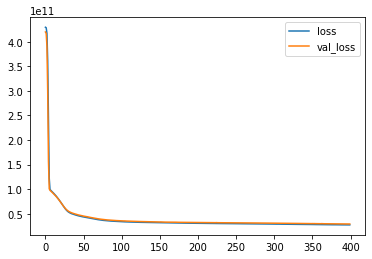

In [37]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluation on Test Data

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [40]:
predictions = model.predict(X_test)

In [41]:
np.sqrt(mean_squared_error(y_test, predictions))

170324.02469624864

In [42]:
mean_absolute_error(y_test, predictions)

104089.51614945022

In [43]:
explained_variance_score(y_test,predictions)

0.7812602930867465

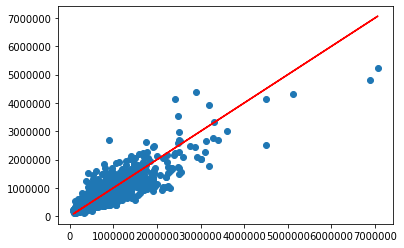

In [46]:
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r-')

## Predicting on a Brand New House

In [53]:
single_house = df.drop('price', axis=1).iloc[0]

In [55]:
single_house = scaler.transform(single_house.values.reshape(-1,X.shape[1]))

In [56]:
model.predict(single_house)

array([[287880.47]], dtype=float32)

In [57]:
df['price'][0]

221900.0